In [67]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings

filterwarnings('ignore')

In [68]:
# First we'll retrieve all the relevant csv files from the directory.
# Than we'll create a list of dataframes (one for each file) and concatenate
# them together in order to work on all the data at once.

data_files = os.listdir('csse_covid_19_data/csse_covid_19_daily_reports')
data_files = pd.Series(data_files, name='Data')
data_files = data_files[data_files.str.contains('.csv')]
data_files = data_files.sort_values()
data_files.head()

32    01-22-2020.csv
33    01-23-2020.csv
43    01-24-2020.csv
42    01-25-2020.csv
23    01-26-2020.csv
Name: Data, dtype: object

In [69]:
df_all = [pd.read_csv(f'csse_covid_19_data/csse_covid_19_daily_reports/{csv_file}') for csv_file in data_files]
len(df_all)

51

In [70]:
df = pd.concat(df_all)
df.reset_index(drop=True, inplace=True)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5148,Alaska,US,2020-03-10T02:33:04,0.0,0.0,0.0,61.3707,-152.4044
5149,Idaho,US,2020-03-10T02:33:04,0.0,0.0,0.0,44.2405,-114.4788
5150,Maine,US,2020-03-10T02:33:04,0.0,0.0,0.0,44.6939,-69.3819
5151,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0,38.4912,-80.9545


In [71]:
df['Last Update'] = pd.to_datetime(df['Last Update'])

df['Date Last Updated'] = df['Last Update'].dt.date
df['Time Last Updated'] = df['Last Update'].dt.time

df = df[['Province/State', 'Country/Region', 'Date Last Updated', 'Time Last Updated' ,'Confirmed', 'Deaths', 'Recovered', 'Latitude', 'Longitude']]
df

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,2020-01-22,17:00:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,2020-01-22,17:00:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,2020-01-22,17:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5148,Alaska,US,2020-03-10,02:33:04,0.0,0.0,0.0,61.3707,-152.4044
5149,Idaho,US,2020-03-10,02:33:04,0.0,0.0,0.0,44.2405,-114.4788
5150,Maine,US,2020-03-10,02:33:04,0.0,0.0,0.0,44.6939,-69.3819
5151,West Virginia,US,2020-03-10,02:33:04,0.0,0.0,0.0,38.4912,-80.9545


In [72]:
df.isnull().sum()

Province/State       1924
Country/Region          0
Date Last Updated       0
Time Last Updated       0
Confirmed              19
Deaths                441
Recovered             388
Latitude             2818
Longitude            2818
dtype: int64

In [98]:
world_wide = df.groupby('Date Last Updated').sum().copy()
world_wide.drop(columns=['Latitude', 'Longitude'], inplace=True)
# world_wide.reset_index(inplace=True)
world_wide.head()

,Confirmed,Deaths,Recovered
Date Last Updated,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [99]:
world_wide.isnull().sum()

Confirmed    0
Deaths       0
Recovered    0
dtype: int64

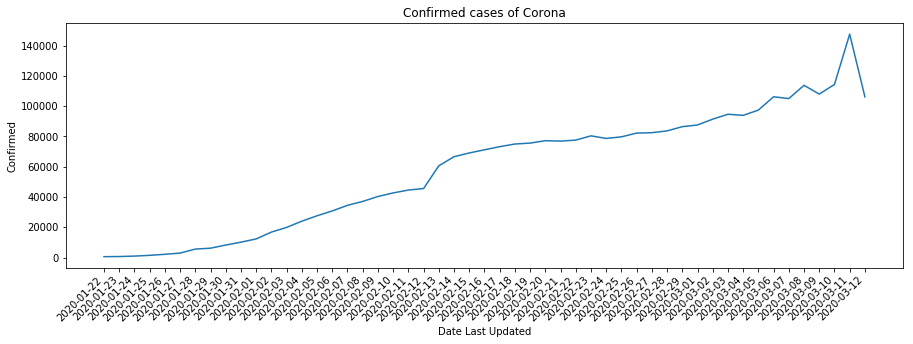

In [108]:
fig, axes = plt.subplots(figsize=(15,5))
fig.autofmt_xdate(rotation=45)

sns.lineplot(x=world_wide.index, y='Confirmed', data=world_wide, ax=axes)
axes.xaxis.set_ticks(world_wide.index);
plt.title('Confirmed cases of Corona');

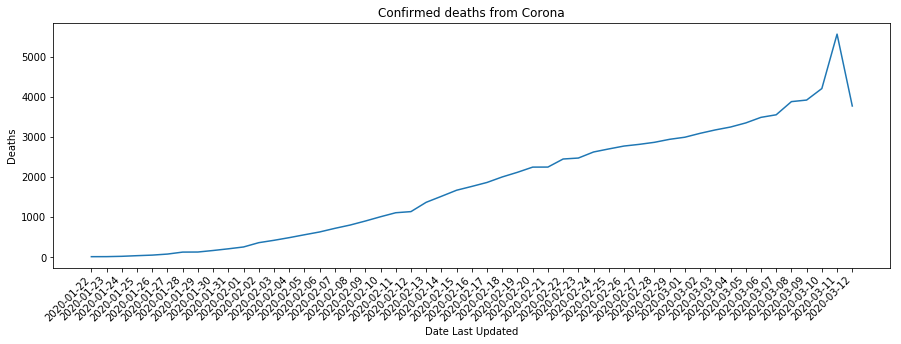

In [109]:
fig, axes = plt.subplots(figsize=(15,5))
fig.autofmt_xdate(rotation=45)

sns.lineplot(x=world_wide.index, y='Deaths', data=world_wide, ax=axes)
axes.xaxis.set_ticks(world_wide.index);
plt.title('Confirmed deaths from Corona');

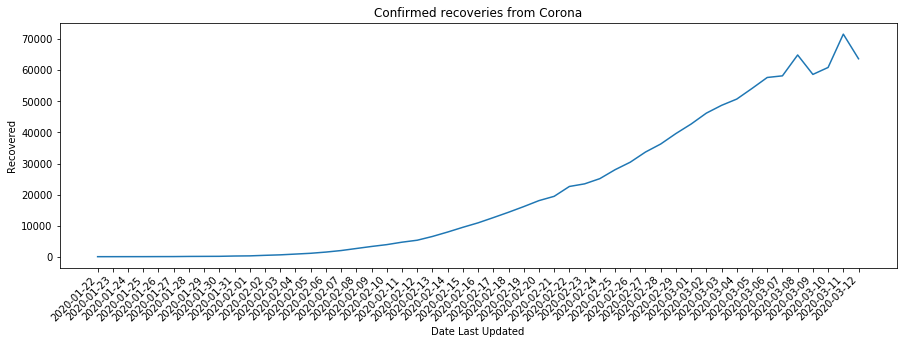

In [110]:
fig, axes = plt.subplots(figsize=(15,5))
fig.autofmt_xdate(rotation=45)

sns.lineplot(x=world_wide.index, y='Recovered', data=world_wide, ax=axes)
axes.xaxis.set_ticks(world_wide.index);
plt.title('Confirmed recoveries from Corona');